<a href="https://colab.research.google.com/github/emre-serin/dsa210-project/blob/main/DSA210_YoutubeDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [61]:
!pip install pandas matplotlib
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import ttest_ind

DATA PREPROCESSING

I cleaned and normalized my watch history data in this part of the code. I extracted the videos' years and sorted them by time to make my job easier comparing the data in different years.

In [63]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['year'] = df['time'].dt.year
df['date'] = df['time'].dt.date

df = df.sort_values(by='time')

Saving izleme geçmişi.json to izleme geçmişi (4).json


WATCH DURATIONS

In this part, I calculated watch durations and identified Shorts videos based on title/URL. After that, I classified the videos as short if they are Shorts or watched for less than 60 seconds.

In [64]:
df['watch_duration'] = df.groupby('date')['time'].diff().dt.total_seconds()

df['is_shorts'] = df['title'].str.contains('#shorts', case=False) | df['titleUrl'].str.contains('/shorts/')

df['less_than_60_seconds'] = df['is_shorts'] | (df['watch_duration'] <= 60)

NUMBER OF VIDEOS PER YEAR

I grouped the videos by year as 2023 or 2024. I calculated the number of videos that I watched each year and created a bar chart to visualize the difference in my Youtube usage between 2023 and 2024.

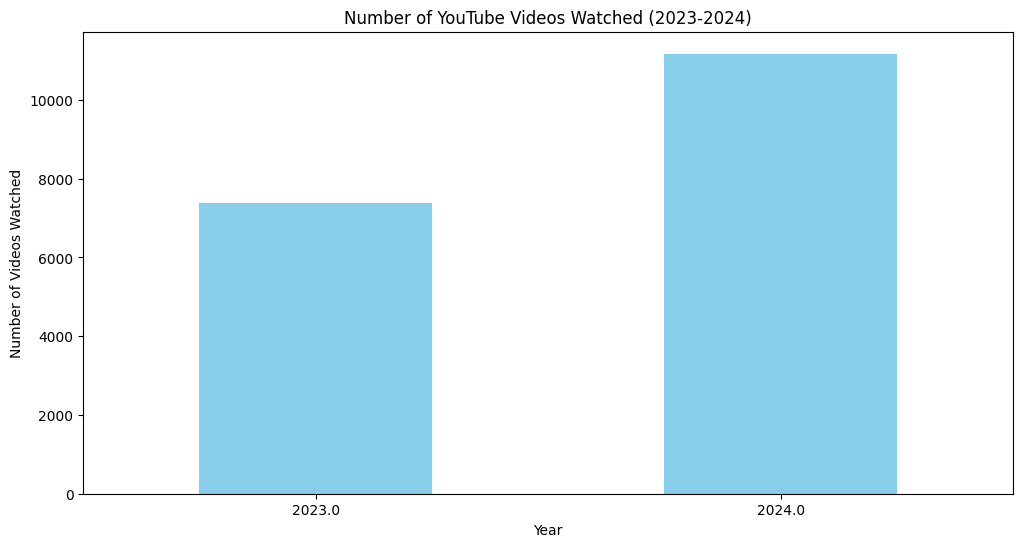

Number of YouTube Videos Watched in 2023 and 2024:
year
2023.0     7374
2024.0    11174
Name: title, dtype: int64


In [65]:
df_filtered = df[df['year'].isin([2023, 2024])]

videos_watched_per_year = df_filtered.groupby('year')['title'].count()

plt.figure(figsize=(12, 6))
videos_watched_per_year.plot(kind='bar', color='skyblue')
plt.title("Number of YouTube Videos Watched (2023-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=0)
plt.show()

print("Number of YouTube Videos Watched in 2023 and 2024:")
print(videos_watched_per_year)

SHORT VS. LONG VIDEOS VIDEOS PER YEAR

I filtered short and long videos per year and created a dataframe. I calculated the number of short and long videos that I watched in each year and visualized using a bar chart.

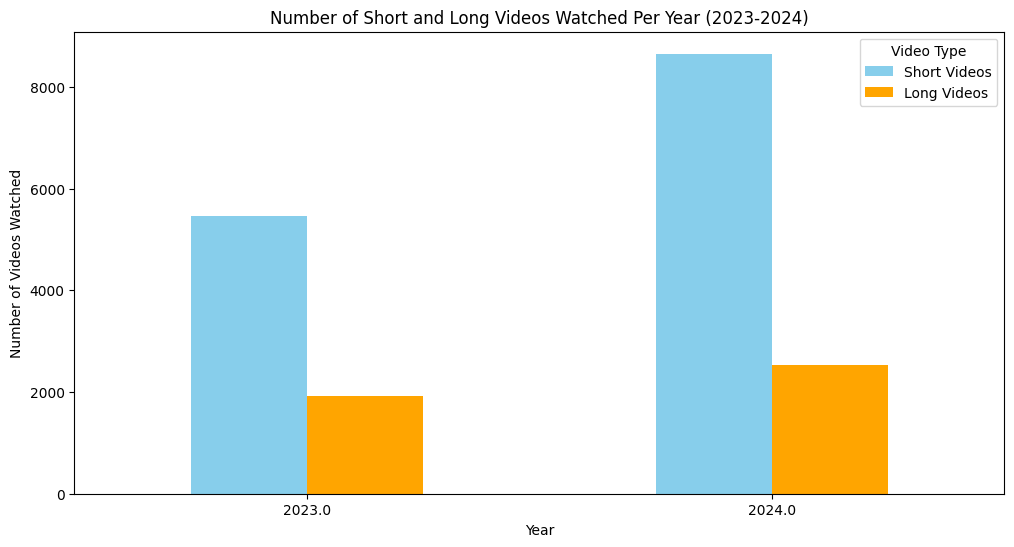

Number of Short and Long Videos Watched in 2023 and 2024:
        Short Videos  Long Videos
year                             
2023.0          5454         1920
2024.0          8650         2524


In [66]:
short_videos_per_year = df_filtered[df_filtered['less_than_60_seconds']].groupby('year')['title'].count()
long_videos_per_year = df_filtered[~df_filtered['less_than_60_seconds']].groupby('year')['title'].count()

videos_per_year = pd.DataFrame({
    'Short Videos': short_videos_per_year,
    'Long Videos': long_videos_per_year
}).fillna(0)

videos_per_year.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Number of Short and Long Videos Watched Per Year (2023-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=0)
plt.legend(title="Video Type")
plt.show()

print("Number of Short and Long Videos Watched in 2023 and 2024:")
print(videos_per_year)

ONE TAILED T-TEST

I conducted a one tailed t-test to test the hypothesis that the average duration of YouTube videos that I watched has decreased from 2023 to 2024. According to our p-value of 0.12 the difference between the average durations is not significant. ALthough there is a decrease in the duration of videos that I watch between 2023 and 2024, we fail to reject the null hypothesis. There is no enough evidence to conclude that I tended to watch shorter videos in 2024 compared to 2023.

In [67]:
durations_2023 = df_filtered[(df_filtered['year'] == 2023) & (df_filtered['watch_duration'] <= 60)]['watch_duration'].dropna()
durations_2024 = df_filtered[(df_filtered['year'] == 2024) & (df_filtered['watch_duration'] <= 60)]['watch_duration'].dropna()

t_stat, p_value = ttest_ind(durations_2023, durations_2024, alternative='less')

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.172232060102812
P-value: 0.120562197897826
